In [1]:
# Import libraries that we'll need...
import pandas as pd
import numpy as np
from scipy import stats, interpolate
from sklearn.utils import resample
from matplotlib import pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
# Import data (I uploaded a copy to blackboard) and see what's in it
df_func_renal = pd.read_excel('liver_data.xlsx')
df_func_renal.head()

,age,comp_liver_ind
0,18,2.44
1,19,3.86
2,19,-1.22
3,20,2.30
4,21,0.98


In [3]:
# Computing Lowess fit
df_func_renal['lowess_fit'] = lowess(df_func_renal['comp_liver_ind'], df_func_renal['age'], return_sorted=False, frac=1/3) \
                                 .reshape(df_func_renal['comp_liver_ind'].shape[0],)

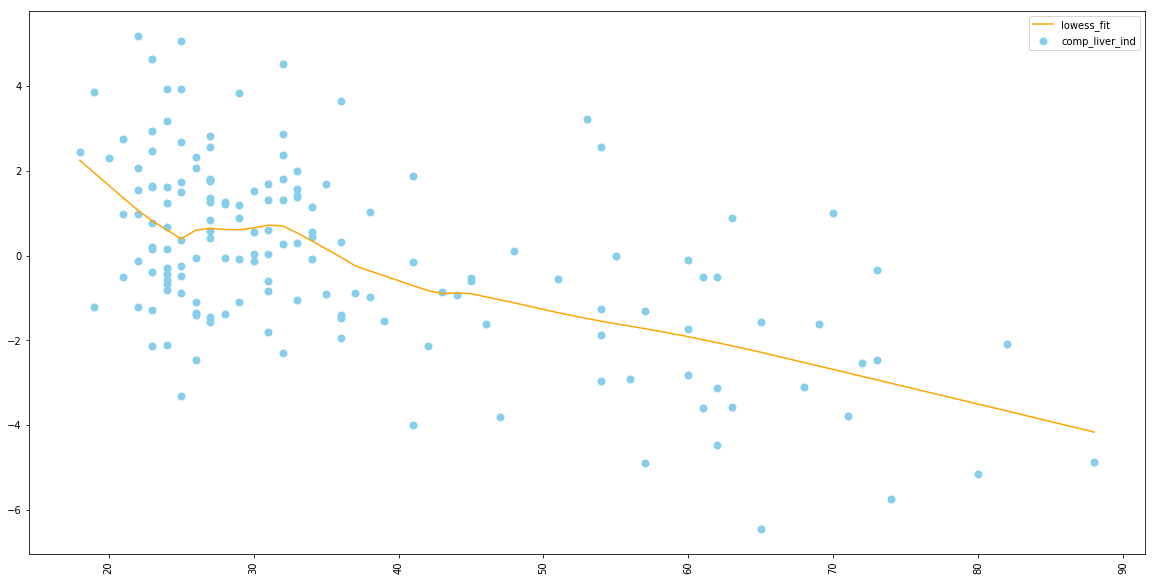

In [4]:
# Plotting Lowess predicions vs. data
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(df_func_renal['age'], df_func_renal['comp_liver_ind'],
         marker='o', color='skyblue', linewidth=2)
plt.plot(df_func_renal['age'], df_func_renal['lowess_fit'], color='orange')
plt.legend()
plt.show()

In [5]:
# Perform bootstrap resampling and collect results.
N = df_func_renal['age'].shape[0]
B = 500
for bootstrap_it in range(1, B+1):
    resampled_df = resample(df_func_renal[['age', 'comp_liver_ind']], n_samples=N)
    resampled_df['lowess_fit_B' + str(bootstrap_it)] = lowess(resampled_df['comp_liver_ind'], resampled_df['age'], return_sorted=False, frac=1/3) \
                                 .reshape(resampled_df['comp_liver_ind'].shape[0],)
    resampled_df = resampled_df.groupby('age')['lowess_fit_B' + str(bootstrap_it)].mean().reset_index()
    df_func_renal = df_func_renal.merge(resampled_df[['age', 'lowess_fit_B' + str(bootstrap_it)]], on='age', how='left')
df_func_renal['se_boot'] = np.nanstd(df_func_renal.drop(['age', 'comp_liver_ind', 'lowess_fit'], 1), axis=1)

In [6]:
# Perform jacknife resampling and collect results.
df_func_renal['ind'] = df_func_renal.index
for jackknife_it in range(df_func_renal.shape[0]):
    resampled_df = df_func_renal.loc[df_func_renal['ind'] != jackknife_it, ['age', 'comp_liver_ind']]
    resampled_df['lowess_fit_J' + str(jackknife_it)] = lowess(resampled_df['comp_liver_ind'], resampled_df['age'], return_sorted=False, frac=1/3) \
                                 .reshape(resampled_df['comp_liver_ind'].shape[0],)
    resampled_df = resampled_df.groupby('age')['lowess_fit_J' + str(jackknife_it)].mean().reset_index()
    df_func_renal = df_func_renal.merge(resampled_df[['age', 'lowess_fit_J' + str(jackknife_it)]], on='age', how='left')

In [7]:
df_func_renal.head(20)

,age,comp_liver_ind,lowess_fit,lowess_fit_B1,lowess_fit_B2,lowess_fit_B3,lowess_fit_B4,lowess_fit_B5,lowess_fit_B6,lowess_fit_B7,...,lowess_fit_J147,lowess_fit_J148,lowess_fit_J149,lowess_fit_J150,lowess_fit_J151,lowess_fit_J152,lowess_fit_J153,lowess_fit_J154,lowess_fit_J155,lowess_fit_J156
0,18,2.44,2.247922,1.441898,NaN,1.864105,2.623523,2.405633,NaN,3.662488,...,2.242831,2.254288,2.242272,2.242831,2.242831,2.248761,2.232527,2.242832,2.253268,2.242831
1,19,3.86,1.952439,1.242390,1.691727,1.720106,2.260286,2.075864,2.747787,3.090712,...,1.949136,1.956574,1.948765,1.949136,1.949136,1.952991,1.942460,1.949136,1.955920,1.949136
2,19,-1.22,1.952439,1.242390,1.691727,1.720106,2.260286,2.075864,2.747787,3.090712,...,1.949136,1.956574,1.948765,1.949136,1.949136,1.952991,1.942460,1.949136,1.955920,1.949136
3,20,2.30,1.657627,NaN,NaN,NaN,1.897501,1.747578,NaN,2.560660,...,1.655948,1.659736,1.655754,1.655948,1.655948,1.657913,1.652573,1.655948,1.659409,1.655948
4,21,0.98,1.363646,0.842868,0.812067,1.400014,1.539952,1.425419,1.988075,2.031892,...,1.363488,1.363862,1.363461,1.363488,1.363488,1.363682,1.363203,1.363488,1.363836,1.363488
5,21,-0.50,1.363646,0.842868,0.812067,1.400014,1.539952,1.425419,1.988075,2.031892,...,1.363488,1.363862,1.363461,1.363488,1.363488,1.363682,1.363203,1.363488,1.363836,1.363488
6,21,2.74,1.363646,0.842868,0.812067,1.400014,1.539952,1.425419,1.988075,2.031892,...,1.363488,1.363862,1.363461,1.363488,1.363488,1.363682,1.363203,1.363488,1.363836,1.363488
7,22,-0.12,1.071268,0.619082,0.413486,1.248517,1.169306,1.104615,1.612325,1.329638,...,1.073079,1.069025,1.073264,1.073079,1.073079,1.070983,1.076789,1.073079,1.069397,1.073079
8,22,-1.21,1.071268,0.619082,0.413486,1.248517,1.169306,1.104615,1.612325,1.329638,...,1.073079,1.069025,1.073264,1.073079,1.073079,1.070983,1.076789,1.073079,1.069397,1.073079
9,22,0.99,1.071268,0.619082,0.413486,1.248517,1.169306,1.104615,1.612325,1.329638,...,1.073079,1.069025,1.073264,1.073079,1.073079,1.070983,1.076789,1.073079,1.069397,1.073079


In [8]:
df_func_renal['theta_dot'] = np.nanmean(df_func_renal[[col for col in df_func_renal.columns if '_J' in col]], axis=1)
jack_cols = [col for col in df_func_renal.columns if '_J' in col]
sum_vec = df_func_renal['lowess_fit'].values * 0
for c in jack_cols:
    sum_vec += (df_func_renal[c].fillna(method='bfill').fillna(method='pad')
                - df_func_renal['theta_dot'].values) ** 2
df_func_renal['se_jack'] = np.sqrt(sum_vec * ((N-1) / N))

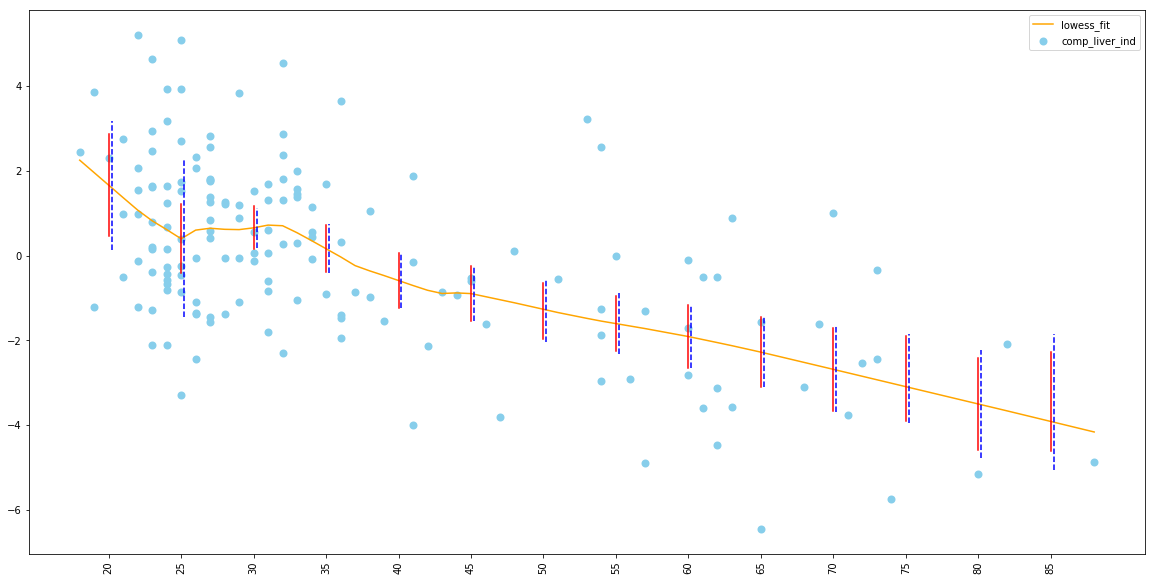

In [9]:
# Plotting Lowess predictions (with bootstrap se's) vs. data
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(df_func_renal['age'], df_func_renal['comp_liver_ind'],
         marker='o', color='skyblue', linewidth=2)
plt.plot(df_func_renal['age'], df_func_renal['lowess_fit'], color='orange')
y_low, y_high = plt.ylim()
for mark in np.linspace(20,85,14):
    if (df_func_renal['age'] == mark).sum()>=1:
        local_x = df_func_renal['age'] == mark
        low_val = df_func_renal.loc[local_x ,'lowess_fit'].mean() - 2 * df_func_renal.loc[local_x, 'se_boot'].mean()
        low_valJ = df_func_renal.loc[local_x ,'lowess_fit'].mean() - 2 * df_func_renal.loc[local_x, 'se_jack'].mean()
        high_val = df_func_renal.loc[local_x ,'lowess_fit'].mean() + 2 * df_func_renal.loc[local_x, 'se_boot'].mean()
        high_valJ = df_func_renal.loc[local_x ,'lowess_fit'].mean() + 2 * df_func_renal.loc[local_x, 'se_jack'].mean()
    else:
        df_func_renal['tmp'] = np.abs(df_func_renal['age'] - mark)
        df_tmp = df_func_renal.sort_values('tmp').head(5)
        mid_val = df_tmp['lowess_fit'].mean()
        low_val = mid_val - 2 * df_tmp['se_boot'].mean()
        low_valJ = mid_val - 2 * df_tmp['se_jack'].mean()
        high_val = mid_val + 2 * df_tmp['se_boot'].mean()
        high_valJ = mid_val + 2 * df_tmp['se_jack'].mean()
    plt.axvline(x=mark, color='red', linestyle='-',
                ymin=(low_val-y_low) / (y_high-y_low),
                ymax=(high_val-y_low) / (y_high-y_low))
    plt.axvline(x=mark + 0.2, color='blue', linestyle='--',
                ymin=(low_valJ-y_low) / (y_high-y_low),
                ymax=(high_valJ-y_low) / (y_high-y_low))
plt.legend()
plt.xticks(np.linspace(20,85,14))
plt.show()